In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB



import numpy as np
import matplotlib.pyplot as plt
from PIL import Image




RANDOM_STATE = 0 

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [8]:
np.set_printoptions(threshold=10000)

In [12]:
# Pandas funcionando com arquivo local
f_vader = pd.read_csv(r"vader_p_emo_class.csv", names = ['texto', 'Polarity Vader'])
f_vader.head()

,texto,Polarity Vader
0,hi dear diary once again i'm sitting here fee...,-1
1,it's amazing to realize that we are coming tog...,1
2,in life we ​​need to count on the support of t...,1
3,i'm very happy and i hope you are too,1
4,we ordered a pizza to celebrate and i wrote a...,1


In [13]:
f_vader.columns

Index(['texto', 'Polarity Vader'], dtype='object')

In [14]:
f_vader = f_vader.reset_index()

In [15]:

f_mqd = pd.read_csv(r"https://raw.githubusercontent.com/LaCAfe/MQD-1465/main/MQD-1465.csv", names = ['texto', 'Polarity Judge', 'Juiz'])
f_mqd.head()

,texto,Polarity Judge,Juiz
36,"Oi querido diário, mais uma vez estou aqui me ...",-1,3
37,É maravilhoso saber que a cada dia estamos nos...,1,3
38,Na vida precisamos contar com o apoio daquela ...,0,3
39,Estou muito feliz e espero que você também.,1,3
40,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1,3


In [16]:
f_mqd.columns

Index(['texto', 'Polarity Judge', 'Juiz'], dtype='object')

In [17]:
f_mqd2 = f_mqd.reset_index()

In [18]:
#Concatena dois dataframes em um terceiro, novo dataframe
f = pd.concat([f_mqd2, f_vader], axis=1)


f

,index,texto,Polarity Judge,Juiz,index,texto,Polarity Vader
0,36,"Oi querido diário, mais uma vez estou aqui me ...",-1,3,0,hi dear diary once again i'm sitting here fee...,-1
1,37,É maravilhoso saber que a cada dia estamos nos...,1,3,1,it's amazing to realize that we are coming tog...,1
2,38,Na vida precisamos contar com o apoio daquela ...,0,3,2,in life we ​​need to count on the support of t...,1
3,39,Estou muito feliz e espero que você também.,1,3,3,i'm very happy and i hope you are too,1
4,40,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1,3,4,we ordered a pizza to celebrate and i wrote a...,1
...,...,...,...,...,...,...,...
1460,1531,Atualmente estou em um relacionamento homossex...,0,2,1460,i am currently in a homosexual relationship,0
1461,1532,"Hoje iniciei o dia conversando com o Gabriel, ...",0,3,1461,today i started the day talking to gabriel th...,1
1462,1533,"Mas ele é lindo, aquele sorriso, a forma como ...",1,3,1462,but he's handsome that smile the way he talk...,1
1463,1534,"Mandei um e-mail para o meu ""colega"" na quarta...",0,3,1463,"i sent an email to my ""colleague"" last wednesd...",0


In [19]:
type(f['Polarity Judge'])

pandas.core.series.Series

In [20]:
f.dtypes

index              int64
texto             object
Polarity Judge     int64
Juiz               int64
index              int64
texto             object
Polarity Vader     int64
dtype: object

In [21]:
polarity_judge = f['Polarity Judge'].values
polarity_judge

array([-1,  1,  0,  1,  1,  1,  1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1,
        0,  0,  1,  1,  1, -1,  0,  0,  1,  0,  0, -1,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  0, -1, -1, -1, -1,  0,  1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1,  0,  0,  0, -1, -1, -1,  0,  0, -1,
       -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1,
       -1,  0,  0, -1,  0,  0,  0,  0,  1, -1,  0,  0, -1, -1,  0,  0,  0,
       -1,  1,  1,  1,  1,  0, -1,  0,  0,  0,  1, -1,  0, -1,  1, -1, -1,
       -1, -1, -1,  1, -1,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  0, -1, -1, -1,  0, -1, -1, -1, -1,
       -1,  0,  0,  0,  1,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1,  1,
        0, -1,  0, -1, -1,  0, -1,  0,  0,  1,  1,  0, -1,  0, -1, -1, -1,
       -1,  0, -1, -1,  0,  1,  1,  0,  0,  1,  0,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1, -1, -1,  0,
       -1,  0, -1, -1, -1

In [22]:
polarity_judge2 = f['Polarity Judge'].values.copy()
polarity_judge2

array([-1,  1,  0,  1,  1,  1,  1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1,
        0,  0,  1,  1,  1, -1,  0,  0,  1,  0,  0, -1,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  0, -1, -1, -1, -1,  0,  1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1,  0,  0,  0, -1, -1, -1,  0,  0, -1,
       -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1,
       -1,  0,  0, -1,  0,  0,  0,  0,  1, -1,  0,  0, -1, -1,  0,  0,  0,
       -1,  1,  1,  1,  1,  0, -1,  0,  0,  0,  1, -1,  0, -1,  1, -1, -1,
       -1, -1, -1,  1, -1,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  0, -1, -1, -1,  0, -1, -1, -1, -1,
       -1,  0,  0,  0,  1,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1,  1,
        0, -1,  0, -1, -1,  0, -1,  0,  0,  1,  1,  0, -1,  0, -1, -1, -1,
       -1,  0, -1, -1,  0,  1,  1,  0,  0,  1,  0,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1, -1, -1,  0,
       -1,  0, -1, -1, -1

In [23]:
polarity_vader = f['Polarity Vader'].values
polarity_vader

array([-1,  1,  1,  1,  1,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        0,  0,  1,  0,  0,  1,  1,  0, -1,  0, -1, -1,  1,  1,  0, -1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  0,  0, -1, -1, -1,  0,  0, -1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  0,  0, -1,  1, -1,  1, -1,  1,
        0,  0,  0,  0,  1,  0,  0,  1,  1, -1,  1,  0, -1,  1,  1,  0, -1,
        1,  1, -1,  1,  1,  0,  1,  0,  0,  1,  1, -1,  0,  0,  1, -1,  1,
       -1, -1, -1,  1, -1,  0,  1,  1, -1,  0, -1,  0,  1,  1,  0,  0, -1,
        1,  0,  1,  1,  1,  1,  1,  1,  1, -1, -1,  0,  0,  1, -1,  1,  0,
        0,  1,  1,  1,  1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  1,
        0, -1,  0, -1, -1,  1, -1,  0,  1,  1, -1,  1, -1,  1,  1,  1, -1,
       -1,  0, -1,  1,  1,  1,  1,  0, -1,  1,  1,  0, -1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  0,  0, -1,  1,
       -1,  0, -1, -1, -1

In [24]:
confusion_matrix = pd.crosstab(f['Polarity Judge'], f['Polarity Vader'], rownames=['Actual'], colnames=['Vader'])
print (confusion_matrix)


Vader    -1    0    1
Actual               
-1      334   68  143
 0       56  167  187
 1       38   33  439


In [25]:
import seaborn as sn

In [26]:
import matplotlib.pyplot as plt

Vader    -1    0    1
Actual               
-1      334   68  143
 0       56  167  187
 1       38   33  439


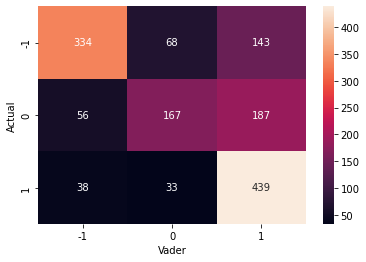

In [27]:
confusion_matrix = pd.crosstab(f['Polarity Judge'], f['Polarity Vader'], rownames=['Actual'], colnames=['Vader'])
print (confusion_matrix)
sn.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

Vader    -1    0    1   All
Actual                     
-1      334   68  143   545
0        56  167  187   410
1        38   33  439   510
All     428  268  769  1465


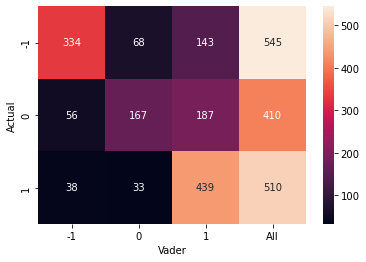

In [28]:
confusion_matrix = pd.crosstab(f['Polarity Judge'], f['Polarity Vader'], rownames=['Actual'], colnames=['Vader'], margins = True)
print (confusion_matrix)
confusion_matrix = confusion_matrix.drop('All', axis=0)
sn.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

<AxesSubplot:xlabel='Vader', ylabel='Actual'>

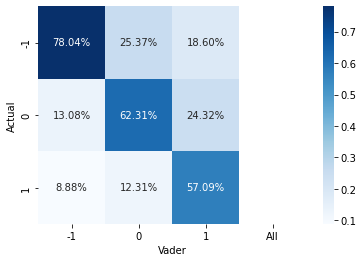

In [29]:
sn.heatmap(confusion_matrix/np.sum(confusion_matrix.drop("All", axis=1)), annot=True, 
            fmt='.2%', cmap='Blues')

In [30]:
from sklearn.metrics import classification_report

In [31]:
y_true = [-1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,
        1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1]
y_pred = [-1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
        1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
        1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
        1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
        1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
        1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,
        1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,
        1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
        1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1]
target_names = ['class -1', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    class -1       0.81      0.61      0.70       531
     class 1       0.68      0.85      0.75       505

    accuracy                           0.73      1036
   macro avg       0.75      0.73      0.73      1036
weighted avg       0.75      0.73      0.73      1036



In [32]:
y_true = polarity_judge2.copy()
y_pred = polarity_vader.copy()
target_names = ['class -1', 'class 0','class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    class -1       0.78      0.61      0.69       545
     class 0       0.62      0.41      0.49       410
     class 1       0.57      0.86      0.69       510

    accuracy                           0.64      1465
   macro avg       0.66      0.63      0.62      1465
weighted avg       0.66      0.64      0.63      1465



In [33]:
from sklearn.metrics import confusion_matrix



In [34]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)

[[334  68 143]
 [ 56 167 187]
 [ 38  33 439]]


In [35]:
import seaborn as sns
import numpy as np

<AxesSubplot:>

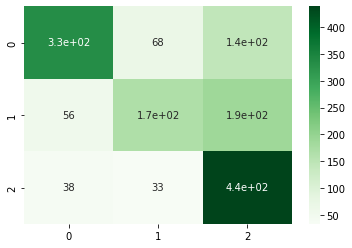

In [36]:
sns.heatmap(cf_matrix, annot=True, cmap='Greens')

In [37]:
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

ValueError: cannot reshape array of size 9 into shape (2,2)

In [38]:
confusion_matrix(y_true, y_pred)

array([[334,  68, 143],
       [ 56, 167, 187],
       [ 38,  33, 439]])

In [39]:
from matplotlib.ticker import PercentFormatter

In [40]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [41]:
pip install pretty-confusion-matrix

Note: you may need to restart the kernel to use updated packages.


In [42]:
from pretty_confusion_matrix import pp_matrix

In [43]:
from pretty_confusion_matrix import pp_matrix_from_data

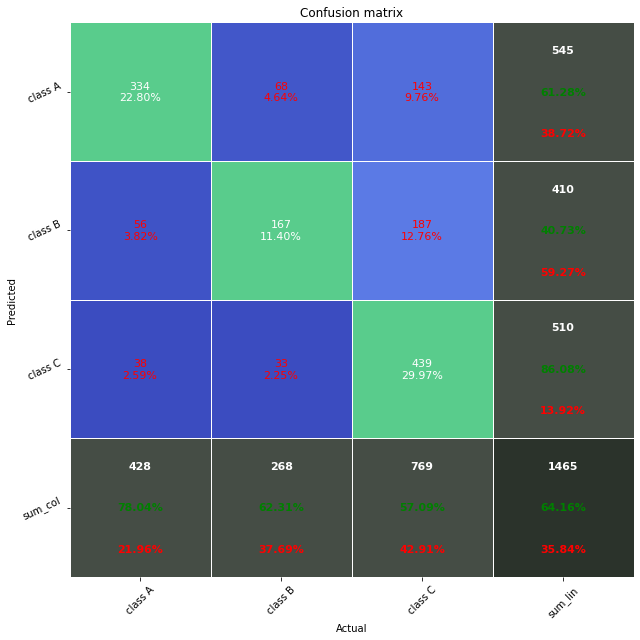

<Figure size 432x288 with 0 Axes>

In [44]:
cmap='Greens'
;
y_test = np.array(y_true)
predic = np.array(y_pred)
pp_matrix_from_data(predic,y_test, cmap='coolwarm')
plt.savefig('MQD_CM')

In [ ]:
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn


y_test = y_true
predic = y_pred

columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

confm = confusion_matrix(y_test, predic)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True)

In [ ]:
# get pandas dataframe
df_cm = pd.DataFrame(confusion_matrix, index=range(1, 7), columns=range(1, 7))
# colormap: see this and choose your more dear
#cmap = 'PuRd'
pp_matrix(df_cm, cmap=cmap)